# <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS7: Estimación espectral. Ventanas en acción!

#### Pablo Romero


# Introducción
En este trabajo se consideraron 200 realizaciones por cada ventana analizada en la TS6.
Se graficaron los histogramas para cada caso, se definieron dos estimadores de formas distintas y se compararon sesgo y varianza para cada uno.




Text(0.5, 0, '[rad]')

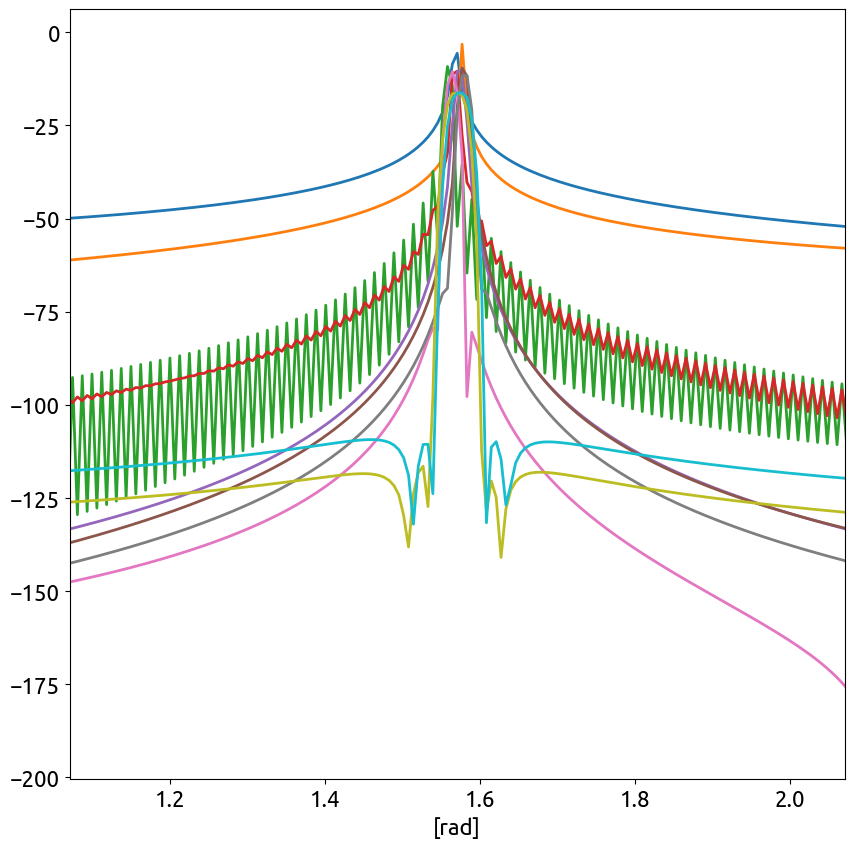

In [22]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

from numpy.fft import fft
import matplotlib.pyplot as plt
import scipy.signal as sig

import pandas
from pandas import DataFrame
from IPython.display import HTML


#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

##############################################
#%% A partir de aquí comienza lo IMPORTANTE #
#############################################
 
vmax=1       #Amplitud Maxima [Volts]
dc=0            #Valor de continua [Volts]
f0=1 #Frecuencia en [Hz][]
ph=np.pi*1   #Fase [rad]
nn=1000  #Muestras del ADC
fs=1000#Frecuencia de muestreio del ADC [Hz]
k0=nn/4
f0=k0*fs/nn #Frecuencia en [Hz][]         
Ts=1/fs
delta_f=fs/nn
B_bits=4
vf=2
SNRa=25


# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = nn*over_sampling
fs_os=fs*over_sampling

# datos del ruido
q=vf/2**(B_bits-1)


pot_ruido = np.power(vmax,2)/(2*np.power(10, SNRa/10))

kn = 1
# pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)

# fr = np.random.rand(200, 1)

# noise_analog = np.random.normal(0,np.sqrt(pot_ruido), N_os)


# vmax=np.sqrt(2)

reali=200
amplitud=1
zero_padd = 0
Wbins=2

## El factor de proporcionalidad en la normalizacion es 
Omega0 = np.pi/2

fr = np.random.rand(1,reali).reshape(reali,1)
fr=fr-0.5
fr=(fr*4)*delta_f
# fr = fr - fr    #Esto lo hago para ver que pasaria si tengo el valor exacto siembre. Mato la dispercion.


Omega1 = (Omega0 + fr*((2*np.pi)/nn))

tt = np.arange(0.0, nn/fs, 1/fs)
tt = tt.reshape(1, tt.shape[0])
ff= np.arange(0.0, fs, fs/((zero_padd+1)*nn))
ff = ff.reshape(1,ff.shape[0])


arg = Omega1*fs*tt
xx_sen_mat=np.sin(arg)*amplitud

#Creo las distintas ventanas
win_Rectangular=sig.windows.boxcar(nn).reshape(1,nn)
win_Bartlett=np.bartlett(nn).reshape(1,nn)
win_Hann=np.hanning(nn).reshape(1,nn)
win_Blackman=np.blackman(nn).reshape(1,nn)
win_Flattop=sig.windows.flattop(nn).reshape(1,nn)


#Aplico las ventanas a mis realizaciones

xx_rect=xx_sen_mat*win_Rectangular
xx_bart=xx_sen_mat*win_Bartlett
xx_hann=xx_sen_mat*win_Hann
xx_black=xx_sen_mat*win_Blackman
xx_flattop=xx_sen_mat*win_Flattop


xx_rect = np.append(xx_rect, np.zeros([reali,zero_padd*nn]),axis=-1)
xx_bart = np.append(xx_bart, np.zeros([reali,zero_padd*nn]),axis=-1)
xx_hann = np.append(xx_hann, np.zeros([reali,zero_padd*nn]),axis=-1)
xx_black = np.append(xx_black, np.zeros([reali,zero_padd*nn]),axis=-1)
xx_flattop = np.append(xx_flattop, np.zeros([reali,zero_padd*nn]),axis=-1)




XX_rect = np.transpose(fft(xx_rect/xx_rect.shape[1], axis=-1))
XX_bart = np.transpose(fft(xx_bart/xx_bart.shape[1], axis=-1))
XX_hann = np.transpose(fft(xx_hann/xx_hann.shape[1], axis=-1))
XX_black = np.transpose(fft(xx_black/xx_black.shape[1], axis=-1))
XX_flattop = np.transpose(fft(xx_flattop/xx_flattop.shape[1], axis=-1))

# XX_3d = np.stack ((XX_rect, XX_bart, XX_hann, XX_black, XX_flattop))

# XX_sen_mat=fft(xx_sen_mat/xx_sen_mat.shape[1], axis=-1)




# est_amp = np.abs(XX[250, :])

# bfrec = ff1 <= fs

# ff= np.arange(0.0, fs, fs/((zero_padd+1)*nn))
# ff



# Pot_estimada= np.sum(2*np.abs(np.transpose(XX_sen_mat))**2, axis=0)

# sub_matriz= 


plt.figure(1)
plt.clf()

# Generar matriz de estimadores
# medianas=

# Sesgo = np.median(Estimadores) - amplitud 
# Varianza(np.mean())

rad=np.arange(0.0, 2*np.pi , (2*np.pi)/((zero_padd+1)*(nn)))

plt.plot( rad, 10* np.log10(2*np.abs((XX_rect[:,1:3]))**2), lw=2,label='rect')
plt.plot( rad, 10* np.log10(2*np.abs((XX_bart[:,140:142]))**2), lw=2,label='bart')
plt.plot( rad, 10* np.log10(2*np.abs((XX_hann[:,189:191]))**2), lw=2,label='hann')
plt.plot( rad, 10* np.log10(2*np.abs((XX_black[:,67:69]))**2), lw=2,label='black')
plt.plot( rad, 10* np.log10(2*np.abs((XX_flattop[:,45:47]))**2), lw=2,label='flattop')
plt.xlim([np.pi/2-0.5,np.pi/2+0.5])
plt.xlabel("[rad]")






        

Mostramos solo 3 realizaciones por ventana para no ensuciar el gráfico y que se pueda apreciar la diferencia entre las distintas ventanas. 

In [23]:
#%%  Calculo de Estimadores


#Estimador 1 es simplemente el modulo por dos.
def Estimador1(XX):
    
    temp = np.abs(XX[250,:])*2
    return temp

#Estimador2 calculamos la potencia y apartir de la potencia calculamos la amplitud.
def Estimador2(XX, bins):
    
    Densidad_Pot= 2* np.abs(XX)**2
    Region_de_Pot = Densidad_Pot[250-bins:250+bins+1, :]
    Pot_acotada_est = np.sum(Region_de_Pot, axis = 0)
    
    return np.sqrt(2*Pot_acotada_est)


# # El primer estimador, se calcula directamente como el valor absoluto al cuadrado.
# Est1amp_rect = np.abs(XX_rect[250,:])*2

# #Para el 2do estimador, tendremos que calcular la potencia, integrando una determinada region de la densidad de potencia.
# #Haremos un calculo de que porcentaje de la potencia total estamos usando al definir una determinada region.
# Densidad_Pot_rect = 2* np.abs(XX_rect)**2
# bfrec = ff < fs/2
# Pot_total_est = np.sum(Densidad_Pot_rect[bfrec], axis = 0)
# Region_de_Pot_rect = Densidad_Pot_rect[250-Wbins:250+Wbins+1, :]
# Pot_acotada_est = np.sum(Region_de_Pot_rect, axis = 0)
# Porcentaje_Pot_rect = (np.mean(Pot_acotada_est)/np.mean(Pot_total_est))*100
# print("Porcentaje de potencia" ,Porcentaje_Pot_rect)
# Est2amp_rect = np.sqrt(2*Pot_total_est)

#Armo una matriz con todos los estimadores para las distintas ventanas.
Estimadores = np.stack ((Estimador1(XX_rect), Estimador2(XX_rect, Wbins), Estimador1(XX_bart), Estimador2(XX_bart,Wbins), Estimador1(XX_hann), Estimador2(XX_hann,Wbins),Estimador1(XX_black), Estimador2(XX_black,Wbins),Estimador1(XX_flattop), Estimador2(XX_flattop,Wbins))).transpose()


#Calculo mediana, sesgo y varianza para todos los casos.
Medianas= np.median(Estimadores, axis = 0)
Sesgo= np.median(Estimadores, axis = 0) - amplitud
Varianza = np.mean((Estimadores - Medianas)**2, axis = 0)

#Armo mi matriz de resultados.
Resultados = np.stack ((Sesgo, Varianza)).transpose()



#Lo muestro en una tabla de valores
df = DataFrame(Resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular Slice',
                        'Rectangular Integral',
                        'Bartlett Slice',
                        'Bartlett Integral',
                        'Hann Slice',
                        'Hann Integral',
                        'Blackman Slice',
                        'Blackman Integral',
                        'Flat-top Slice',
                        'Flat-top Integral'
                     ])

#pandas.set_option('display.max_colwidth', 1)
HTML(df.to_html(col_space = '300px', justify = 'center'))
#HTML(df.to_html(notebook = True))

,$s_a$,$v_a$
Rectangular Slice,-0.791477,0.136034
Rectangular Integral,-0.025818,0.000370
Bartlett Slice,-0.771085,0.031416
Bartlett Integral,-0.423589,0.000053
Hann Slice,-0.726051,0.028551
Hann Integral,-0.388098,0.000153
Blackman Slice,-0.733047,0.015615
Blackman Integral,-0.449382,0.000268
Flat-top Slice,-0.790180,0.000570
Flat-top Integral,-0.604837,0.000627


Mostramos tabla comparativa donde se ve la diferencia entre ventanas y estimadores.

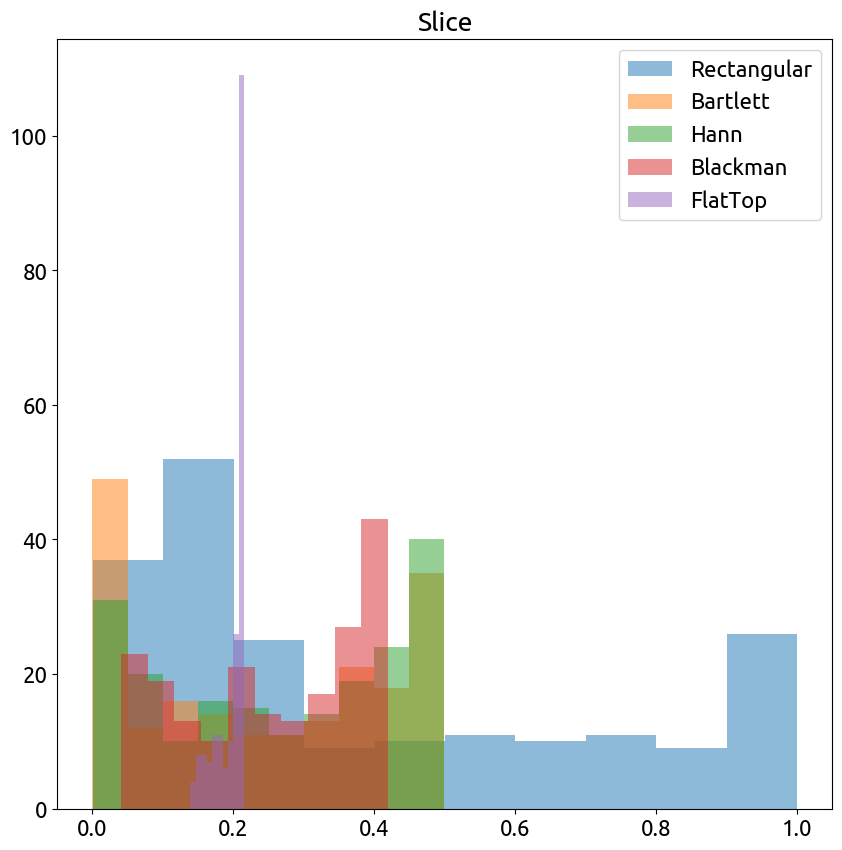

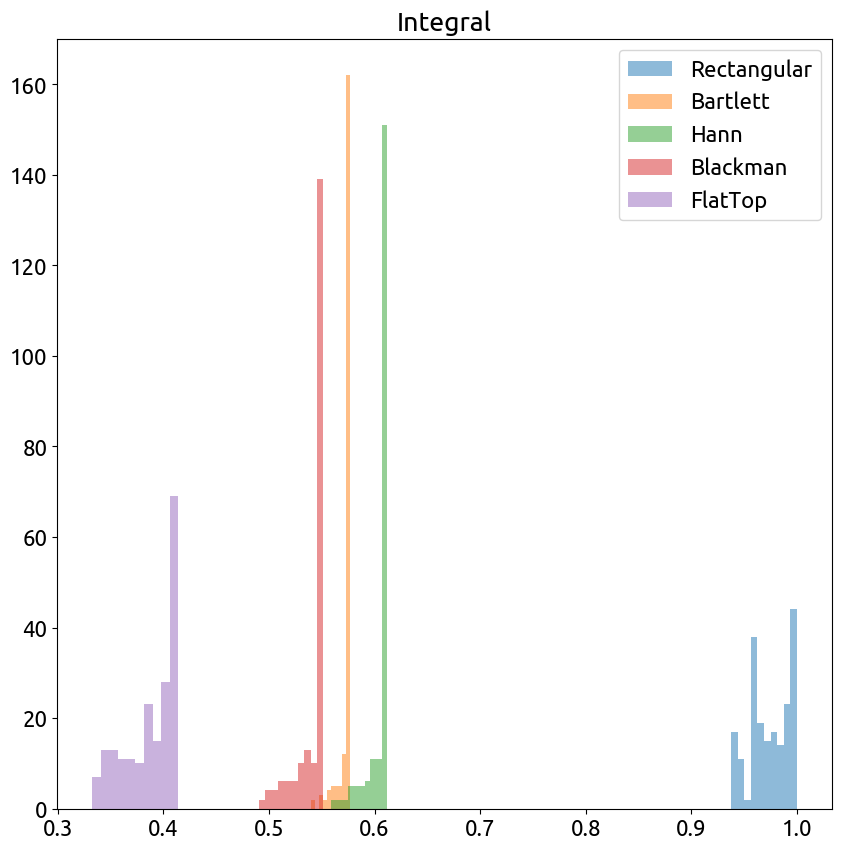

In [25]:
#Histogramas

plt.figure(3)
plt.clf()

plt.title("Slice")
kwargs = dict(alpha=0.5,bins = 10, density=False, stacked=True)
#kwargs_2 = dict(alpha=0.5, bins = 2,density=False, stacked=True)
plt.hist(Estimadores[:,0],**kwargs, label = "Rectangular")
plt.hist(Estimadores[:,2],**kwargs, label = "Bartlett")
plt.hist(Estimadores[:,4],**kwargs, label = "Hann")
plt.hist(Estimadores[:,6],**kwargs, label = "Blackman")
plt.hist(Estimadores[:,8],**kwargs, label = "FlatTop")
plt.legend()

plt.figure(4)
plt.clf()

plt.title("Integral")
kwargs = dict(alpha=0.5,bins = 10, density=False, stacked=True)
#kwargs_2 = dict(alpha=0.5, bins = 2,density=False, stacked=True)
plt.hist(Estimadores[:,1],**kwargs, label = "Rectangular")
plt.hist(Estimadores[:,3],**kwargs, label = "Bartlett")
plt.hist(Estimadores[:,5],**kwargs, label = "Hann")
plt.hist(Estimadores[:,7],**kwargs, label = "Blackman")
plt.hist(Estimadores[:,9],**kwargs, label = "FlatTop")
plt.legend()

plt.show()

Comparando los histogramas, vemos que en el caso slice, al tomar solo un valor de cada realización, la varianza es mayor para todas las ventanas. En el caso integral, como el estimador de la varianza se construye a partir de integrar valores en el entorno de la frecuencia de interes, la varianza es mucho menor.

En la table de valores, tambien podemos notar que el sesgo es menor para el caso del estimador por integral.



Fin del documento